## Lab 7: Kernels, Support Vector Machines

### Part I: Kernels 

#### Exercise 1. A complex dataset

Consider the dataset given below. We want to learn a classifier for this data, by relying on the $\ell_2$ loss.  

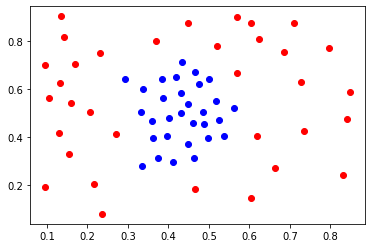

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx1class1.mat')['PointsEx1class1']
pointsClass2 = loadmat('KernelPointsEx1class2.mat')['PointsEx1class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

#### Exercise 1.1 Gradient updates on the dual formulation

Start by generating polynomial features using the function 'sklearn.preprocessing.PolynomialFeatures' from scikit learn. By relying on the kernel trick, starting from the $\ell_2$ (OLS) loss, derive the dual formulation (optimization problem on the coefficients $\lambda_i$ that are used to express the weight vector $\beta$ as the combination $\beta$). Once you have that loss, find the optimal coefficients $\lambda^*$ through gradient updates. 

In [2]:
# create array of targets and points
target_class1 = np.ones((np.shape(pointsClass1)[0],1)) 
target_class2 = np.zeros((np.shape(pointsClass2)[0],1))

targets = np.vstack((target_class1, target_class2))
points = np.vstack((pointsClass1, pointsClass2))

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(50)
phi = poly.fit_transform(points)

N = len(targets)
# size of phi N times number of features 
# Phi = [phi(x^1)^T; phi(x^2)^T; .... phi(x^N)^T]
# my convention is that phi(x^i) are vertical 


# Phi*Phi^T
Kernel = np.matmul(phi, phi.T)


In [4]:
# put your code here 

import numpy as np
import matplotlib.pyplot as plt


MaxIter = 100000
eta = 0.01

lbd = np.zeros((N,1));

# lambda = lambda + eta*(1/N)*(t- sum lambda Phi^T phi)


for i in range(MaxIter):
    lbd += eta*(1/N)*(targets - np.matmul(Kernel, lbd)) 

#### Exercise 1.2 Final Models

Using the optimal coefficients, derive the classifier $y(\mathbf{x}) = \mathbf{\beta}^T\mathbf{\phi}(\mathbf{x})$, expressing the weight vector $\mathbf{\beta}$ as the combination $\mathbf{\beta} = \sum_{i=1}^N \lambda_i^* \mathbf{\phi}(\mathbf{x}^{(i)})$. Then display the boundary by using meshgrid. 

In [5]:
# print(np.shape(phi))
# print(np.shape(lbd.T))
# beta = np.matmul(lbd.T,phi)


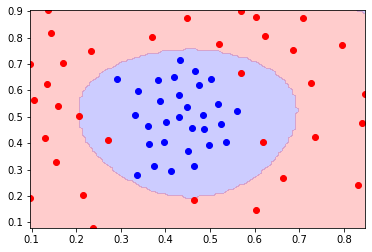

In [6]:
beta = np.matmul(lbd.T,phi)


x1max = np.max(points[:,0])
x1min = np.min(points[:,0])
x2max = np.max(points[:,1])
x2min = np.min(points[:,1])


xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100),np.linspace(x2min, x2max, 100) )

Xpredict = (np.vstack((xx1.flatten(), xx2.flatten()))).T

phi_x = poly.fit_transform(Xpredict)

# y(x) = sum lambda_i (phi(i)^T phi(x)) = beta^T phi(x)
# y(x) = beta^T phi(x) = (sum_i lambda_i phi(x_i)^T phi(x))

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

prediction = np.matmul(beta,phi_x.T) 

fig, ax = plt.subplots()
ax.contourf(xx1, xx2, np.reshape(prediction>0.5, np.shape(xx1)), cmap=cm_bright, alpha=0.2, levels=1)
plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()



#### Exercise 2 A disconnected dataset. 

We want to make the problem a little more difficult. Use your implementation of descent algorithm to learn a classifier for the dataset below. Progressively increase the number of features (i.e. increase the degree) and keep in mind that there is often and efficient way to compute the Kernel matrix. 

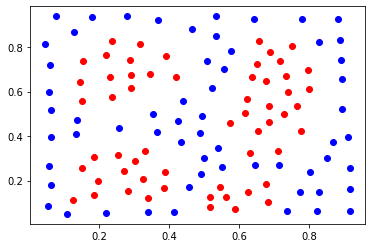

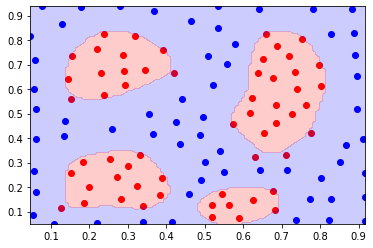

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.io import loadmat

pointsClass1 = loadmat("KernelPointsEx2class1.mat")["PointsEx2class1"]
pointsClass2 = loadmat("KernelPointsEx2class2.mat")["PointsEx2class2"]

plt.scatter(pointsClass1[:, 0], pointsClass1[:, 1], c="r")
plt.scatter(pointsClass2[:, 0], pointsClass2[:, 1], c="b")
plt.show()

target_class1 = np.ones((np.shape(pointsClass1)[0], 1))
target_class2 = np.zeros((np.shape(pointsClass2)[0], 1))

targets = np.vstack((target_class1, target_class2))
points = np.vstack((pointsClass1, pointsClass2))

N = len(targets)
sigma = 0.06
K = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        K[i, j] = np.exp(-(LA.norm(points[i, :] - points[j, :])**2) / 2 / (sigma**2))

MaxIter = 400
eta = 0.1
lbd = np.zeros((N, 1))

# lambda = lambda + eta*(1/N)*(t- sum lambda Phi^T phi)
for i in range(MaxIter):
    lbd += eta * (1 / N) * (targets - np.matmul(K, lbd))

x1max = np.max(points[:, 0])
x1min = np.min(points[:, 0])
x2max = np.max(points[:, 1])
x2min = np.min(points[:, 1])

xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))

X = np.vstack((xx1.flatten(), xx2.flatten())).T

K_2 = np.zeros((N, np.shape(X)[0]))
for i in range(N):
    for j in range(np.shape(X)[0]):
        # compute the kernel for all x in the test set
        # K(x_i, x)
        K_2[i, j] = np.exp(-(LA.norm(points[i, :] - X[j, :])**2) / 2 / (sigma**2))
        # K_2[i, j] = np.exp(-(LA.norm(X[i, :] - X[j, :])**2) / 2 / (sigma**2))
        # WRONG YOU PIECE OF SHIT, ITS POINTS[I] NOT X[I]     
    
# y = beta^T phi(x) = sum_j lambda_j^* phi(x^j)^T phi(x)
# = sum_j lambda_j^* K(x_j, x)
# y(x) = sum_j lambda_j^* exp(-||x_j - x||^2/2/(sigma**2))

y = np.matmul(lbd.reshape(-1,1).T, K_2)


from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.contourf(xx1, xx2, np.reshape(y>0.5, np.shape(xx1)), cmap=cm_bright, alpha=0.2, levels=1)
plt.show()

#### Exercise 3. From polynomial fesatures to the Gaussian kernel

Use your gradient descent iterations on the $\mathbf{\lambda}_i$ to learn a classifier for the dataset below by relying on the Gaussian kernel. 

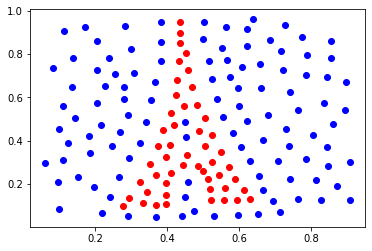

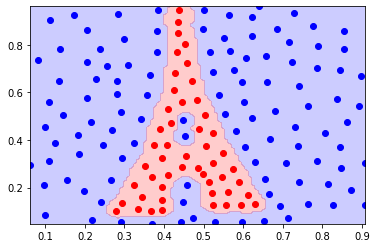

In [9]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx3class1.mat')['PointsEx3class1']
pointsClass2 = loadmat('KernelPointsEx3class2.mat')['PointsEx3class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

points = np.vstack((pointsClass1, pointsClass2))

targets1 = np.ones((np.shape(pointsClass1)[0], 1))
targets2 = np.zeros((np.shape(pointsClass2)[0], 1))
targets = np.vstack((targets1, targets2))


# compute kernet
N = len(targets)
sigma = 0.0345
K = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        K[i,j] = np.exp(-(LA.norm(points[i,:] - points[j,:])**2)/2/(sigma**2))

        
MaxIter =100000

eta = .005

lbd = np.zeros((N,1));

# lambda = lambda + eta*(1/N)*(t- sum lambda Phi^T phi)

# train model
for i in range(MaxIter):
    
    lbd += eta*(1/N)*(targets - np.matmul(K, lbd)) 
    
    
x1max = np.max(points[:,0])
x1min = np.min(points[:,0])
x2max = np.max(points[:,1])
x2min = np.min(points[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100),np.linspace(x2min, x2max, 100) )

X = (np.vstack((xx1.flatten(), xx2.flatten()))).T

K2 = np.zeros((N, np.shape(X)[0]))

for i in range(N):
    for j in range(np.shape(X)[0]):
        K2[i,j] = np.exp(-(LA.norm(points[i,:] - X[j,:])**2)/2/(sigma**2))
        
yPredict = np.matmul(lbd.reshape(-1, 1).T, K2)

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

plt.contourf(xx1, xx2, np.reshape(yPredict>0.5, np.shape(xx1)), cmap=cm_bright, alpha=0.2, levels=1)
plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

### Part II : Maximizing the margin

#### Exercise 1. The hinge loss

Consider the dataset below. We would like to learn a classifier for this dataset that maximizes the margin (i.e. such that the distance between the closest points to the plane is maximized). We have seen that one can solve this problem by means of the constrained formulation

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 \\
\text{subject to} \quad & y(\mathbf{x}^{(i)})t^{(i)} \geq 1 
\end{align*}

where $y(\mathbf{x}^{(i)}) = \mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0$. We might sometimes want to use a (softer) unconstrained formulation. in particular, when selecting this option, we can use the following function known as the _Hinge loss_ 

\begin{align*}
\max(0, 1-t^{(i)}y(\mathbf{x}^{(i)})) = \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

For such a loss, we can derive a softer, unconstrained version of the problem as 

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 + \frac{C}{N}\sum_{i=1}^N \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

In short we penalize a point, only if this point lies on the wrong side of the plane.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx4class1.mat')['PointsEx4class1']
pointsClass2 = loadmat('KernelPointsEx4class2.mat')['PointsEx4class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

# skleanr.svm.SVC

#### Exercise 1.1 

Start by completing the function below which should return the value and gradient of the hinge loss at a point $\mathbf{x}^{(i)}$. What is the gradient of the hinge loss?

In [ ]:
def HingeLoss(x):
    
    '''Returns the value and gradient of the hinge 
    loss at the point x'''
    
    
    
    return value, gradient

#### Exercise 1.2

Once you have the function, implement a function HingeLossSVC that takes as innput a starting weight vector $\mathbf{\beta}$ and intercept $\beta_0$ as well as the set of training points and a value for the parameter $C$ and returns the maximum margin classifier.  

In [ ]:
def HingeLossSVC(beta_init, beta0_init training, C):
    
    '''Returns the maximal margin classifier for the 
    training dataset'''
    
    
    
    
    
    return beta, beta0

#### Exercise 2. 

We now would like to find a maximal margin classifier based on the Gaussian kernel. Write the dual formulation and use the Kernel trick to replace the inner product of the feature vectors with the (Gaussian) Kernel matrix. The dual formulation is quadratically constrained program. In order to solve this problem, we will rely on the [CVXOPT](https://cvxopt.org/) library. You can install this library from the terminal using the line 'pip install cvxopt'  

CVXOPT provides a [quadratic solver](https://cvxopt.org/examples/tutorial/qp.html) which is defined by means of 6 matrices $Q, p, G, h, A, b$ which define the problem to be solved as 

\begin{align*}
\text{minimize} \quad & \frac{1}{2} \mathbf{x}^T\mathbf{P}\mathbf{x} + \mathbf{q}^T\mathbf{x}\\
\text{subject to}\quad  & \mathbf{G}\mathbf{x} \preceq h\\
&\mathbf{A}\mathbf{x} = \mathbf{b}
\end{align*}

Here the notation $\mathbf{x}\preceq 0$ is used to indicate that every entry of the vector $\mathbf{x}$ has to be non negative

#### Exercise 2.1 The gaussian kernel 

Start by providing the definition of the Gaussian kernel in order to define the matrix $\mathbf{P}$

In [ ]:
import numpy as np


def GaussianKernel(training, sigma):
    
    '''should return the kernel matrix K whose 
    entry K_ij is defined as K(x_i, x_j) = exp(-||x_i - x_j||^2/(2*sigma^2))'''
    
    
    return K

#### Exercise 2.2 Solving the QCQP

Relying on the dual formulation and on the Gaussian kernel, provide a sensible definition for each of the matrices $Q, p, G, h, A, b$ and solve the quadratic program using CVXOPT.

In [ ]:
import numpy as np
from cvxopt import matrix, solvers